# QOSF - Task 3

By **Antonio Nó Rodríguez**

Please write a simple compiler – program, which translates one quantum circuit into another, using a restricted set of gates.
You need to consider just the basic gates for the input circuit, such as * (I, H, X, Y, Z, RX, RY, RZ, CNOT, CZ) *.
The output circuit should consist only from the following gates: * RX, RZ, CZ *. In other words, each gate in the original circuit must be replaced by an equivalent combination of gates coming from the restricted set (RX, RZ, CZ) only.

For example, a Hadamard gate after compilation looks like this:
* RX$(\frac{\pi}{2})$
* RZ$(\frac{\pi}{2})$

Analyze what’s the overhead of the compiled program compared to the original one and propose how to improve it. What we mean by overhead is the following: by replacing all the initial gates with the restricted set of gates given in the problem, you will see that the resulting circuit is much more involved than the original one. This is what we called the overhead, and you may think how to treat this problem, i.e. you could try to simplify as much as possible the resulting circuit.

## My approach

I created a function for each gate same as the ones that already exists like QuantumCircuit.h(0). The names are:
* `QuantumCircuit.qi(qubit)`
* `QuantumCircuit.qh(qubit)`
* `QuantumCircuit.qx(qubit)`
* `QuantumCircuit.qy(qubit)`
* `QuantumCircuit.qz(qubit)`
* `QuantumCircuit.qrx(qubit)`
* `QuantumCircuit.qry(qubit)`
* `QuantumCircuit.qrz(qubit)`
* `QuantumCircuit.qcz(qubit)`
* `QuantumCircuit.qcnot(qubit)`
* `QuantumCircuit.qcx(qubit)`

You can call the function as above so it will create a block that integrates the RX, RZ and CZ gates or you can call it with the parameter `RGates=True` so it will show the R Gates applied in the circuit.

To use it, you have to include:
* `from QOSF_FunctionsT3 import QIGate`
* `from QOSF_FunctionsT3 import QHGate`
* `from QOSF_FunctionsT3 import QXGate`
* `from QOSF_FunctionsT3 import QYGate`
* `from QOSF_FunctionsT3 import QZGate`
* `from QOSF_FunctionsT3 import QRXGate`
* `from QOSF_FunctionsT3 import QRYGate`
* `from QOSF_FunctionsT3 import QRZGate`
* `from QOSF_FunctionsT3 import QCZGate`
* `from QOSF_FunctionsT3 import QCNOTGate`

### Example of circuits created in both ways

We set up the environment

In [1]:
from QOSF_FunctionsT3 import QHGate
from QOSF_FunctionsT3 import QXGate
from qiskit import QuantumCircuit

Then we create one circuit with a QH and QX Gates

In [2]:
ex1 = QuantumCircuit(1)
ex1.qx(0)
ex1.qh(0)
ex1.draw()

┌────┐┌────┐
q_0: ┤ QX ├┤ QH ├
     └────┘└────┘

Now we create another circuit showing the gates

In [3]:
ex2 = QuantumCircuit(1)
ex2.qx(0, RGates=True)
ex2.qh(0, RGates=True)
ex2.draw()

┌─────────┐┌────────┐┌────────┐┌───────────┐┌───────────┐┌───────────┐
q_0: ┤ RZ(-pi) ├┤ RX(pi) ├┤ RZ(pi) ├┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├
     └─────────┘└────────┘└────────┘└───────────┘└───────────┘└───────────┘

## Example using Grover's algorithm

To analize the overhead we are going to implement the circuit described in the second example of the Qiskit textbook https://qiskit.org/textbook/ch-algorithms/grover.html with regular gates and our restricted gates.

### Circuit using regular gates

Following the Example 2:

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector

# import basic plot tools
from qiskit.visualization import plot_histogram

In [5]:
n = 2
grover_regular_gates = QuantumCircuit(n)

In [6]:
def initialize_s_regular_gates(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

In [7]:
grover_regular_gates = initialize_s_regular_gates(grover_regular_gates, [0,1])
grover_regular_gates.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

In [8]:
grover_regular_gates.cz(0,1) # Oracle
grover_regular_gates.draw()

┌───┐   
q_0: ┤ H ├─■─
     ├───┤ │ 
q_1: ┤ H ├─■─
     └───┘

In [9]:
# Diffusion operator (U_s)
grover_regular_gates.h([0,1])
grover_regular_gates.z([0,1])
grover_regular_gates.cz(0,1)
grover_regular_gates.h([0,1])
grover_regular_gates.draw()

┌───┐   ┌───┐┌───┐   ┌───┐
q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     ├───┤ │ ├───┤├───┤ │ ├───┤
q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├
     └───┘   └───┘└───┘   └───┘

That is our finished circuit with regular gates.

Now we are going to do the same experiments with simulators and real devices to see the diferences between regular and restricted gates.

In [10]:
sv_sim_regular_gates = Aer.get_backend('statevector_simulator')
job_sim_regular_gates = execute(grover_regular_gates, sv_sim_regular_gates)
statevec_regular_gates = job_sim_regular_gates.result().get_statevector()
print(statevec_regular_gates)

[1.96261557e-16-2.46519033e-32j 2.22044605e-16+1.22464680e-16j
 1.96261557e-16+1.22464680e-16j 1.00000000e+00-2.44929360e-16j]


That statevector is the same as shown in the example.

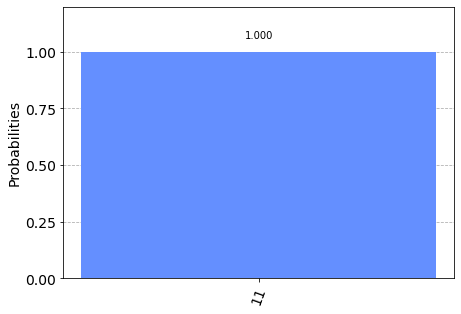

In [11]:
grover_regular_gates.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_regular_gates, backend=qasm_simulator, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

Now we run it in a real device as the example

In [12]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

Running on current least busy device:  ibmqx2


In [14]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job_regular_gates = execute(grover_regular_gates, backend=device, shots=1024, optimization_level=3)
job_monitor(job_regular_gates, interval = 2)

Job Status: job has successfully run


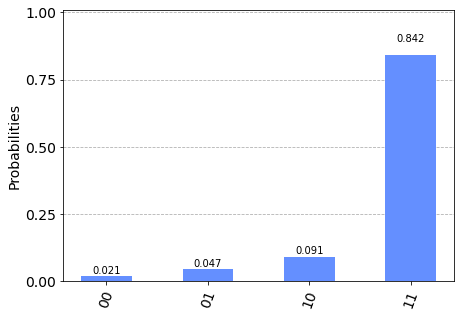

In [15]:
# Get the results from the computation
results_regular_gates = job_regular_gates.result()
answer_regular_gates = results_regular_gates.get_counts(grover_regular_gates)
plot_histogram(answer_regular_gates)

We confirm that the majority of the cases the state |11> is measured with probability higher than 0.65

### Circuit using custom gates

Now we will do the same example using our custom gates. In this case we will do it without the RGates so we can compare the circuits diagrams.

In [16]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector

# import basic plot tools
from qiskit.visualization import plot_histogram

# import our gates qh, qz and qcz
from QOSF_FunctionsT3 import QHGate
from QOSF_FunctionsT3 import QZGate
from QOSF_FunctionsT3 import QCZGate

In [17]:
n = 2
grover_circuit_custom_simple = QuantumCircuit(n)

In [18]:
def initialize_s_custom_simple(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.qh(q)
    return qc

In [19]:
grover_circuit_custom_simple = initialize_s_custom_simple(grover_circuit_custom_simple, [0,1])
grover_circuit_custom_simple.draw()

┌────┐
q_0: ┤ QH ├
     ├────┤
q_1: ┤ QH ├
     └────┘

In [20]:
grover_circuit_custom_simple.qcz(0,1) # Oracle
grover_circuit_custom_simple.draw()

┌────┐      
q_0: ┤ QH ├──■───
     ├────┤┌─┴──┐
q_1: ┤ QH ├┤ QZ ├
     └────┘└────┘

In [21]:
# Diffusion operator (U_s)
grover_circuit_custom_simple.qh([0,1])
grover_circuit_custom_simple.qz([0,1])
grover_circuit_custom_simple.qcz(0,1)
grover_circuit_custom_simple.qh([0,1])
grover_circuit_custom_simple.draw()

┌────┐      ┌────┐┌────┐      ┌────┐
q_0: ┤ QH ├──■───┤ QH ├┤ QZ ├──■───┤ QH ├
     ├────┤┌─┴──┐├────┤├────┤┌─┴──┐├────┤
q_1: ┤ QH ├┤ QZ ├┤ QH ├┤ QZ ├┤ QZ ├┤ QH ├
     └────┘└────┘└────┘└────┘└────┘└────┘

We see the diagram is similar to the one with regular gates

In [22]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim_custom_simple = execute(grover_circuit_custom_simple, sv_sim)
statevec_custom_simple = job_sim_custom_simple.result().get_statevector()
print(statevec_custom_simple)

[1.96261557e-16+7.39557099e-32j 2.22044605e-16-1.72254642e-16j
 1.96261557e-16-1.72254642e-16j 1.00000000e+00+5.66553890e-16j]


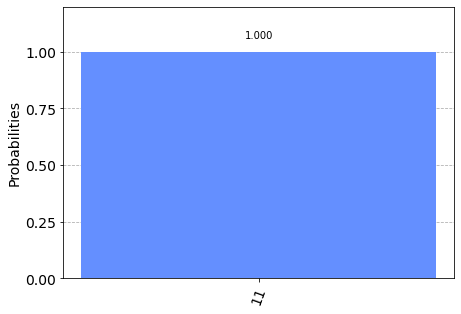

In [23]:
grover_circuit_custom_simple.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results_custom_simple = execute(grover_circuit_custom_simple, backend=qasm_simulator, shots=shots).result()
answer_custom_simple = results_custom_simple.get_counts()
plot_histogram(answer_custom_simple)

Now we run it in a real device

In [24]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2020-09-15 01:18:50,393: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmqx2


In [25]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job_custom_simple = execute(grover_circuit_custom_simple, backend=device, shots=1024, optimization_level=3)
job_monitor(job_custom_simple, interval = 2)

Job Status: job has successfully run


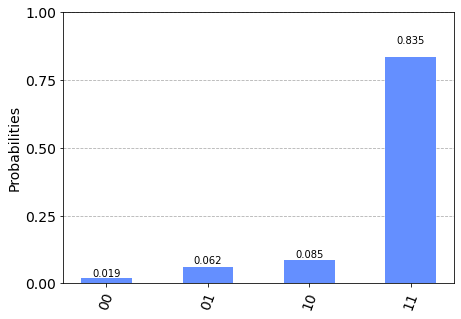

In [26]:
# Get the results from the computation
results_custom_simple = job_custom_simple.result()
answer_custom_simple = results_custom_simple.get_counts(grover_circuit_custom_simple)
plot_histogram(answer_custom_simple)

We see in this case the probability is still very high as before.

### Circuit using custom gates and extended display

Now we are going to use the parameter `RGates=True` that shows the representation of all the gates involved. The result should be the same as before because the parameter only changes the representation.

In [27]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector

# import basic plot tools
from qiskit.visualization import plot_histogram

# import our gates qh, qz and qcz
from QOSF_FunctionsT3 import QHGate
from QOSF_FunctionsT3 import QZGate
from QOSF_FunctionsT3 import QCZGate

In [28]:
n = 2
grover_circuit_custom_full = QuantumCircuit(n)

In [29]:
def initialize_s_custom_full(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.qh(q, RGates=True)
    return qc

In [30]:
grover_circuit_custom_full = initialize_s_custom_full(grover_circuit_custom_full, [0,1])
grover_circuit_custom_full.draw()

┌───────────┐┌───────────┐┌───────────┐
q_0: ┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├
     ├───────────┤├───────────┤├───────────┤
q_1: ┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├
     └───────────┘└───────────┘└───────────┘

In [31]:
grover_circuit_custom_full.qcz(0,1, RGates=True) # Oracle
grover_circuit_custom_full.draw()

┌───────────┐┌───────────┐┌───────────┐   
q_0: ┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├─■─
     ├───────────┤├───────────┤├───────────┤ │ 
q_1: ┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├─■─
     └───────────┘└───────────┘└───────────┘

In [32]:
# Diffusion operator (U_s)
grover_circuit_custom_full.qh([0,1], RGates=True)
grover_circuit_custom_full.qz([0,1], RGates=True)
grover_circuit_custom_full.qcz(0,1, RGates=True)
grover_circuit_custom_full.qh([0,1], RGates=True)
grover_circuit_custom_full.draw()

┌───────────┐┌───────────┐┌───────────┐   ┌───────────┐┌───────────┐»
q_0: ┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├─■─┤ RX(-pi/2) ├┤ RZ(-pi/2) ├»
     ├───────────┤├───────────┤├───────────┤ │ ├───────────┤├───────────┤»
q_1: ┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├─■─┤ RX(-pi/2) ├┤ RZ(-pi/2) ├»
     └───────────┘└───────────┘└───────────┘   └───────────┘└───────────┘»
«     ┌───────────┐┌────────┐   ┌───────────┐┌───────────┐┌───────────┐
«q_0: ┤ RX(-pi/2) ├┤ RZ(pi) ├─■─┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├
«     ├───────────┤├────────┤ │ ├───────────┤├───────────┤├───────────┤
«q_1: ┤ RX(-pi/2) ├┤ RZ(pi) ├─■─┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├
«     └───────────┘└────────┘   └───────────┘└───────────┘└───────────┘

In [33]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim_custom_full = execute(grover_circuit_custom_full, sv_sim)
statevec_custom_full = job_sim_custom_full.result().get_statevector()
print(statevec_custom_full)

[1.96261557e-16+7.39557099e-32j 2.22044605e-16-1.72254642e-16j
 1.96261557e-16-1.72254642e-16j 1.00000000e+00+5.66553890e-16j]


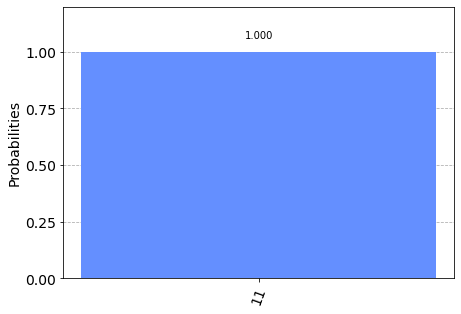

In [34]:
grover_circuit_custom_full.measure_all()

qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results_custom_full = execute(grover_circuit_custom_full, backend=qasm_simulator, shots=shots).result()
answer_custom_full = results_custom_full.get_counts()
plot_histogram(answer_custom_full)

And in a real device

In [35]:
# Load IBM Q account and get the least busy backend device
provider = IBMQ.load_account()
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2020-09-15 01:21:53,698: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_valencia


In [36]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor
job_custom_full = execute(grover_circuit_custom_full, backend=device, shots=1024, optimization_level=3)
job_monitor(job_custom_full, interval = 2)

Job Status: job has successfully run


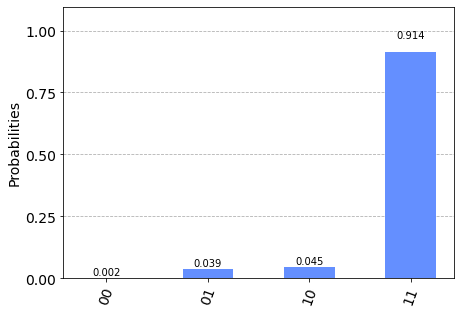

In [37]:
# Get the results from the computation
results_custom_full = job_custom_full.result()
answer_custom_full = results_custom_full.get_counts(grover_circuit_custom_full)
plot_histogram(answer_custom_full)

## Conclusions

We have recreated the gates asked in the task with just the gates Rx, Rz and Cz except the global phase factor $e^{(i\alpha)}$ and we have seen we get similar results in the simulator and in real devices. About the overhead, we can see it clear when we compare the initial circuit to the one with `RGates=True`

In [38]:
grover_regular_gates.draw()

┌───┐   ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
        ├───┤ │ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
   q_1: ┤ H ├─■─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
        └───┘   └───┘└───┘   └───┘ ░  ║ └╥┘
meas_0: ══════════════════════════════╩══╬═
                                         ║ 
meas_1: ═════════════════════════════════╩═

In [39]:
grover_circuit_custom_full.draw()

┌───────────┐┌───────────┐┌───────────┐   ┌───────────┐┌───────────┐»
   q_0: ┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├─■─┤ RX(-pi/2) ├┤ RZ(-pi/2) ├»
        ├───────────┤├───────────┤├───────────┤ │ ├───────────┤├───────────┤»
   q_1: ┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├─■─┤ RX(-pi/2) ├┤ RZ(-pi/2) ├»
        └───────────┘└───────────┘└───────────┘   └───────────┘└───────────┘»
meas_0: ════════════════════════════════════════════════════════════════════»
                                                                            »
meas_1: ════════════════════════════════════════════════════════════════════»
                                                                            »
«        ┌───────────┐┌────────┐   ┌───────────┐┌───────────┐┌───────────┐ ░ »
«   q_0: ┤ RX(-pi/2) ├┤ RZ(pi) ├─■─┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├─░─»
«        ├───────────┤├────────┤ │ ├───────────┤├───────────┤├───────────┤ ░ »
«   q_1: ┤ RX(-pi/2) ├┤ RZ(pi) ├─■─┤ RX(-pi/2) ├┤ RZ(-pi/2) ├┤ RX(-pi/2) ├─░─»
«        └───────────┘└────────┘   └───────────┘└───────────┘└───────────┘ ░ »
«meas_0: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«meas_1: ════════════════════════════════════════════════════════════════════»
«                                                                            »
«        ┌─┐   
«   q_0: ┤M├───
«        └╥┘┌─┐
«   q_1: ─╫─┤M├
«         ║ └╥┘
«meas_0: ═╩══╬═
«            ║ 
«meas_1: ════╩═
«

As we can see both circuits it's clear the complexity of the last one that makes it very hard to interpret and analize while the first one is simple and shows Grover's algorithm at first sight.